## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data

In [2]:
data = pd.read_csv('employee_data.csv', delimiter=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79486 entries, 0 to 79485
Data columns (total 39 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Employee                                                    79486 non-null  object 
 1   Manager of employee                                         79276 non-null  object 
 2   Age                                                         79486 non-null  int64  
 3   Length of service in months                                 79486 non-null  int64  
 4   Gender                                                      79486 non-null  int64  
 5   Nationality                                                 79486 non-null  object 
 6   Weekly working hour                                         79486 non-null  float64
 7   Employee Category                                           79486 non-null  object 
 

In [3]:
#Drop Irrelevant Columns from Dataset 
data  = data.drop(['Employee', 'Manager of employee', 'Job Family ID', 'Sub Job Family ID', 'Cal. year / month', 
                   'Full Time Equivalents', 'Difference to Average Age of the Team (in Years)', 'Children', 
                   'Difference to Average Length of Service of Team (in Years)', 'Difference to Managers Age (in Years)',
                   'Female Quota of the Team (in %)', 'Foreigner Quota of the Team (in %)', 'Became Single in n-Month',
                   'Got Children in n-Month', 'Got Second Job in n-Month', 'Married in n-Month', 'Marital Status',
                   'Difference to Median of Team Pay and Job Type (in %)', 'Z Score in the Team and Job Type'], axis=1)

In [4]:
#Shape of the dataset
data.shape

(79486, 20)

## Missing Values

In [5]:
#Identify number of missing values in the dataset
data.isnull().sum()

Age                                                        0
Length of service in months                                0
Gender                                                     0
Nationality                                                0
Weekly working hour                                        0
Employee Category                                          0
Job                                                        0
Region                                                     0
Country                                                    0
HR location                                                0
Board                                                      0
Function                                                   0
Division // Segment                                        0
Segment Unit                                               0
Difference to Managers Length of Service (in Years)      221
Number of Colleagues in the Team                           0
Probation Period        

In [6]:
# Fill Null Value with the mean of the column
data['Difference to Managers Length of Service (in Years)'] = data['Difference to Managers Length of Service (in Years)'].fillna(data['Difference to Managers Length of Service (in Years)'].mean())
data['Commuting distance (in Kilometers)'] = data['Commuting distance (in Kilometers)'].fillna(data['Commuting distance (in Kilometers)'].mean())
data['Commuting duration (in Minutes)'] = data['Commuting duration (in Minutes)'].fillna(data['Commuting duration (in Minutes)'].mean())

In [7]:
#Check whether any missing values left
print(data.isnull().values.any())

False


## Data Preparation

In [8]:
# Replace values higher than 150 with the mean of values less than 150
mean_value = data.loc[data['Commuting distance (in Kilometers)'] < 150, 'Commuting distance (in Kilometers)'].mean()
data['Commuting distance (in Kilometers)'] = data['Commuting distance (in Kilometers)'].where(
    data['Commuting distance (in Kilometers)'] <= 150, mean_value)

# Replace values higher than 120 with the mean of values less than 120
mean_value = data.loc[data['Commuting duration (in Minutes)'] < 120, 'Commuting duration (in Minutes)'].mean()
data['Commuting duration (in Minutes)'] = data['Commuting duration (in Minutes)'].where(
    data['Commuting duration (in Minutes)'] <= 120, mean_value)

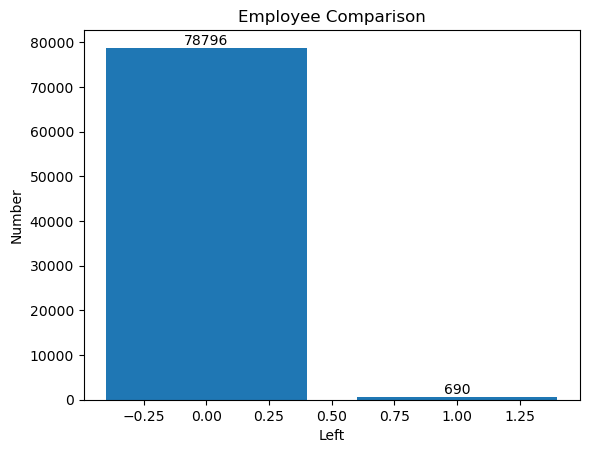

In [9]:
# bar chart for the number of left employee
num_bankrupt = data['Left'].value_counts()
plt.bar(num_bankrupt.index, num_bankrupt.values)
plt.title('Employee Comparison')
plt.xlabel('Left')
plt.ylabel('Number')
for index, value in enumerate(num_bankrupt.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79486 entries, 0 to 79485
Data columns (total 20 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Age                                                  79486 non-null  int64  
 1   Length of service in months                          79486 non-null  int64  
 2   Gender                                               79486 non-null  int64  
 3   Nationality                                          79486 non-null  object 
 4   Weekly working hour                                  79486 non-null  float64
 5   Employee Category                                    79486 non-null  object 
 6   Job                                                  79486 non-null  object 
 7   Region                                               79486 non-null  object 
 8   Country                                              79486 non-nul

## Univariate analysis of the features

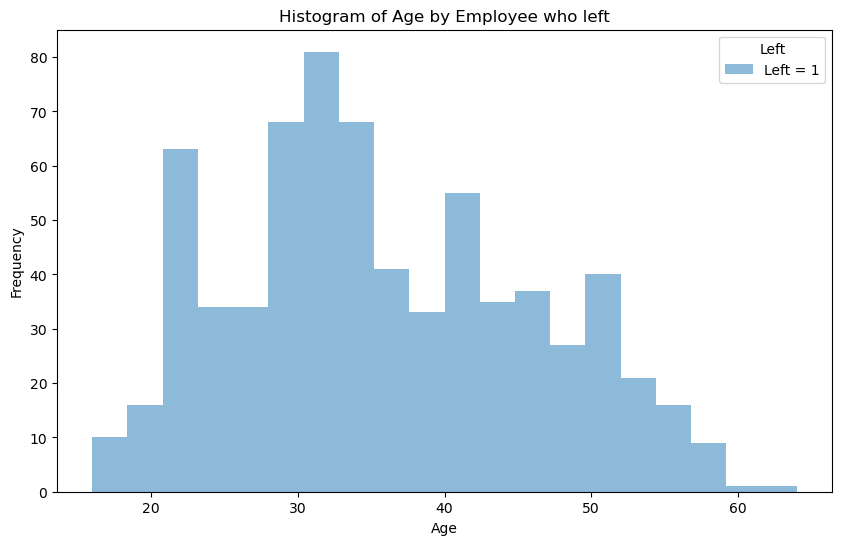

In [11]:
# Plot histogram for Age grouped by Left status
plt.figure(figsize=(10, 6))
plt.hist(
    [data[data['Left'] == 1]['Age']],
    bins=20,
    label=['Left = 1'],
    alpha=0.5,
    stacked=True,
)
plt.title('Histogram of Age by Employee who left')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Left')
plt.show()

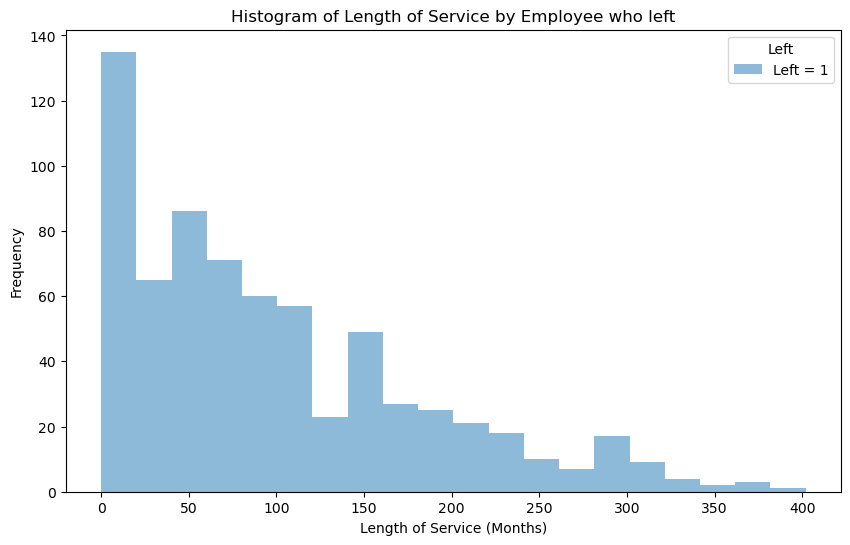

In [12]:
# Plot histogram for Length of service in months grouped by Left status
plt.figure(figsize=(10, 6))
plt.hist(
    [data[data['Left'] == 1]['Length of service in months']],
    bins=20,
    label=['Left = 1'],
    alpha=0.5,
    stacked=True,
)
plt.title('Histogram of Length of Service by Employee who left')
plt.xlabel('Length of Service (Months)')
plt.ylabel('Frequency')
plt.legend(title='Left')
plt.show()

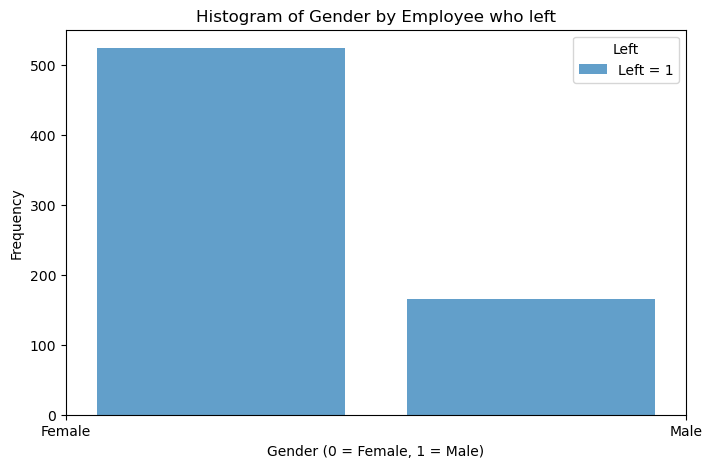

In [13]:
# Plot histogram for Gender grouped by Left status
plt.figure(figsize=(8, 5))
plt.hist(data[data['Left'] == 1]['Gender'],
    bins=2,
    label=['Left = 1'],
    alpha=0.7,
    rwidth=0.8,
)
plt.title('Histogram of Gender by Employee who left')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Left')
plt.show()

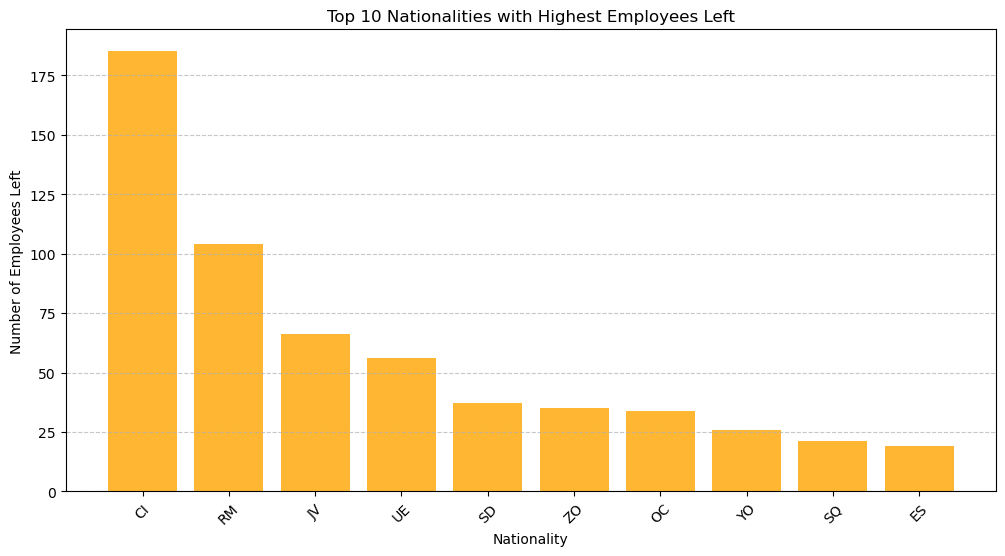

In [14]:
# Calculate the total number of employees who left for each nationality
nationality_left = (
    data[data['Left'] == 1]
    .groupby('Nationality').size().sort_values(ascending=False)
)

# Select the top 10 nationalities with the highest number of employees left
top_10_nationalities_left = nationality_left.head(10)

# Plot histogram for top 10 nationalities with highest employee left
plt.figure(figsize=(12, 6))
plt.bar(
    top_10_nationalities_left.index,
    top_10_nationalities_left.values,
    color='orange',
    alpha=0.8
)
plt.title('Top 10 Nationalities with Highest Employees Left')
plt.xlabel('Nationality')
plt.ylabel('Number of Employees Left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

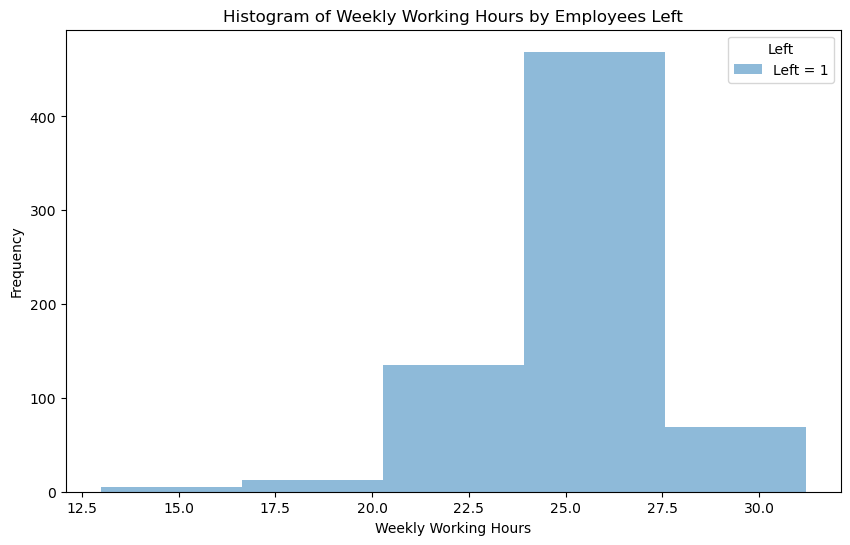

In [15]:
# Plot histogram for Weekly Working Hours grouped by Left status
plt.figure(figsize=(10, 6))
plt.hist(data[data['Left'] == 1]['Weekly working hour'],
    bins=5,
    label=['Left = 1'],
    alpha=0.5,
    stacked=True,
)
plt.title('Histogram of Weekly Working Hours by Employees Left')
plt.xlabel('Weekly Working Hours')
plt.ylabel('Frequency')
plt.legend(title='Left')
plt.show()

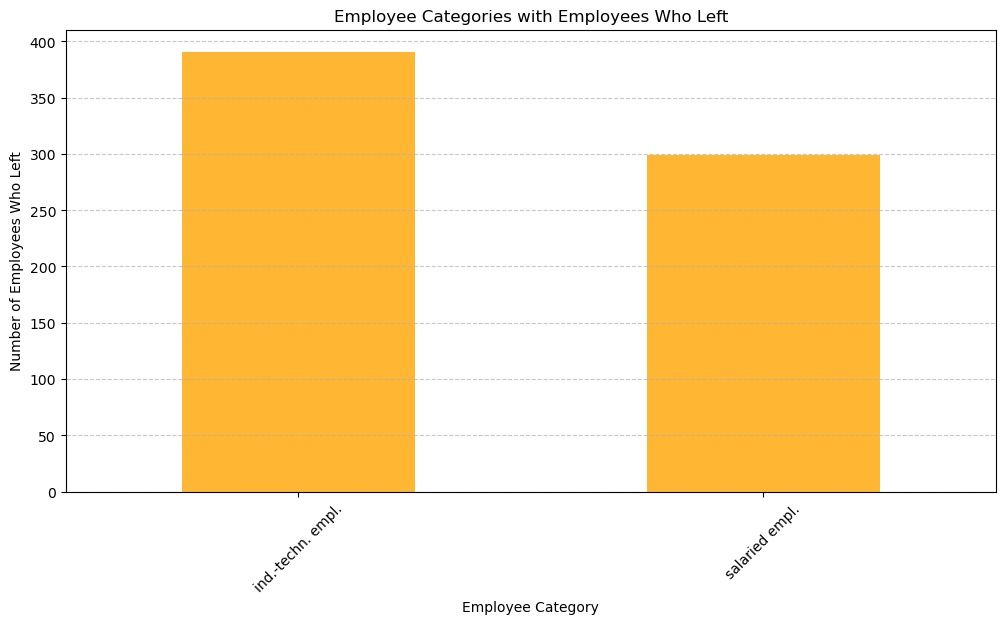

In [16]:
# Filter the data for only employees who left
employee_category_left_only = data[data['Left'] == 1].groupby('Employee Category').size()

# Plot bar chart for employee categories with employees who left
plt.figure(figsize=(12, 6))
employee_category_left_only.sort_values(ascending=False).plot(kind='bar', color='orange', alpha=0.8)
plt.title('Employee Categories with Employees Who Left')
plt.xlabel('Employee Category')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

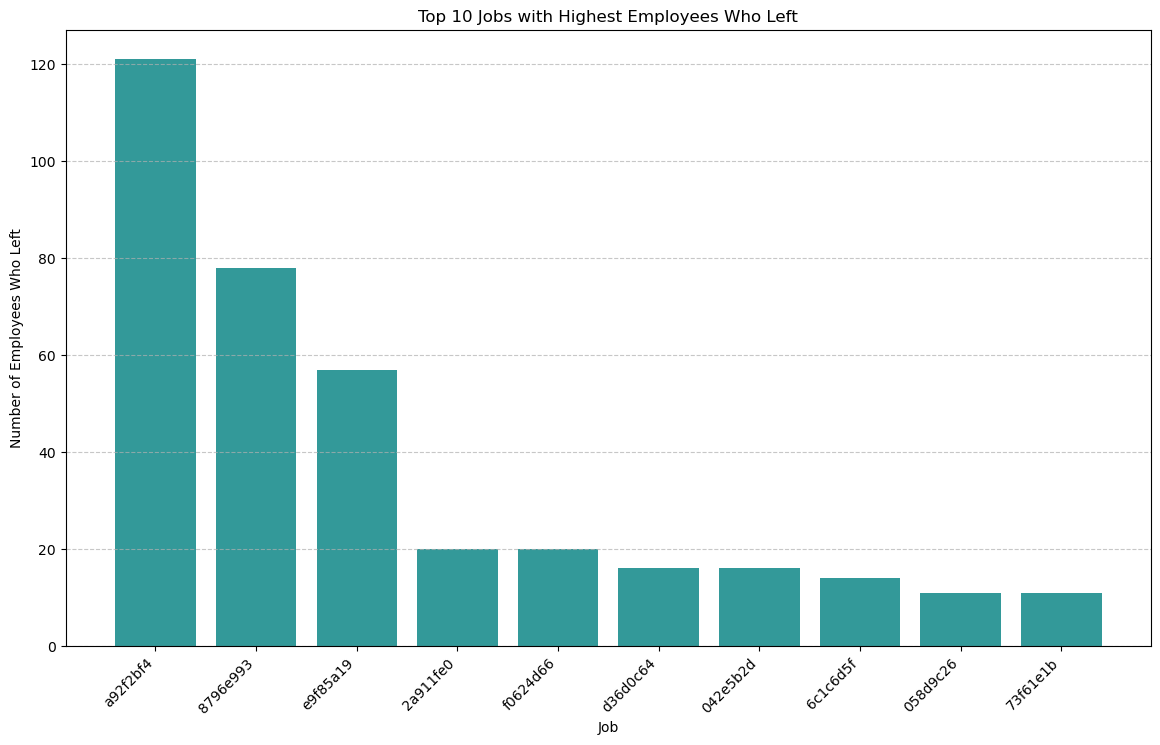

In [17]:
# Filter and group the data to get the top 10 jobs with the highest number of employees who left
job_left = data[data['Left'] == 1].groupby('Job').size().sort_values(ascending=False).head(10)

# Plot histogram for the top 10 jobs with employees who left
plt.figure(figsize=(14, 8))
plt.bar(job_left.index, job_left.values, color='teal', alpha=0.8)
plt.title('Top 10 Jobs with Highest Employees Who Left')
plt.xlabel('Job')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

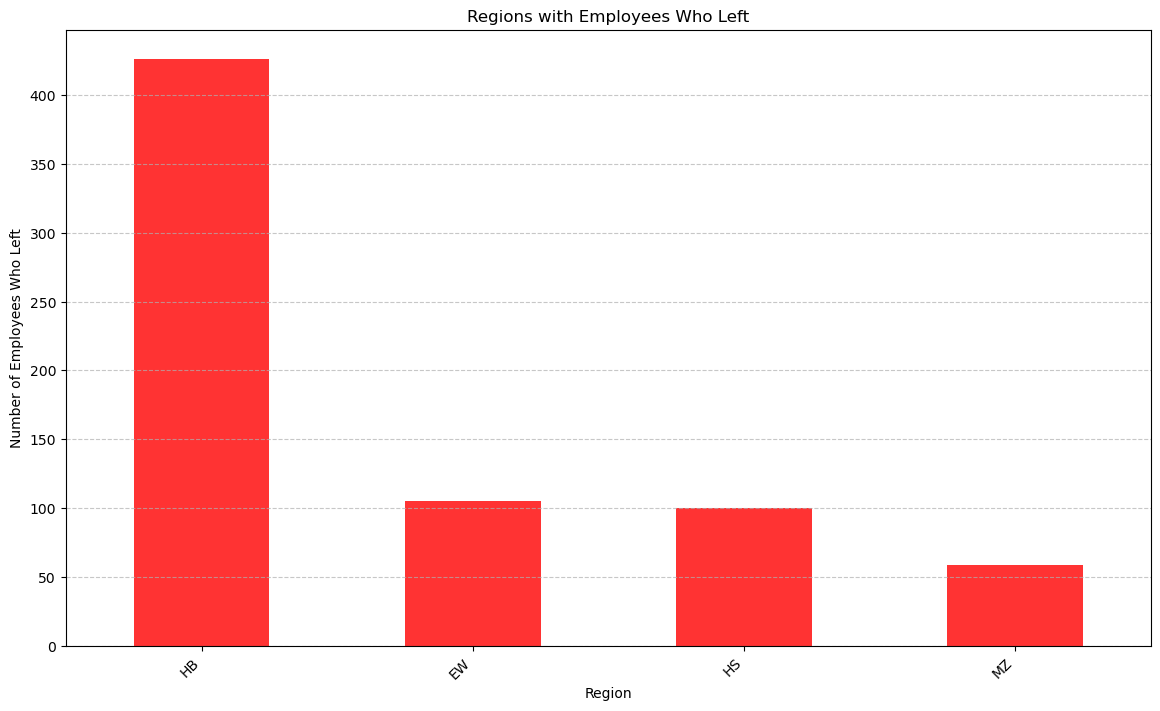

In [18]:
# Filter the data to count the number of employees who left for each region
region_left_only = data[data['Left'] == 1].groupby('Region').size()

# Plot bar chart for regions with employees who left
plt.figure(figsize=(14, 8))
region_left_only.sort_values(ascending=False).plot(kind='bar', color='red', alpha=0.8)
plt.title('Regions with Employees Who Left')
plt.xlabel('Region')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

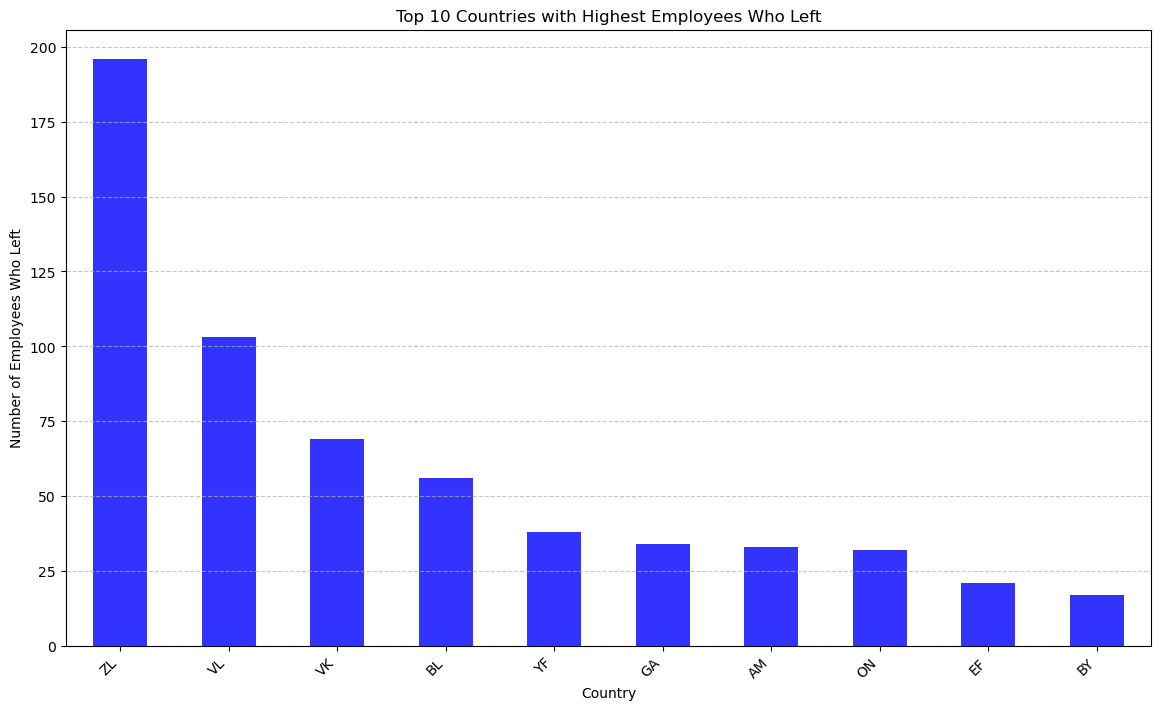

In [19]:
# Filter the data to count the number of employees who left for each country and select the top 10
top_10_countries_left = data[data['Left'] == 1].groupby('Country').size().sort_values(ascending=False).head(10)

# Plot bar chart for the top 10 countries with employees who left
plt.figure(figsize=(14, 8))
top_10_countries_left.plot(kind='bar', color='blue', alpha=0.8)
plt.title('Top 10 Countries with Highest Employees Who Left')
plt.xlabel('Country')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

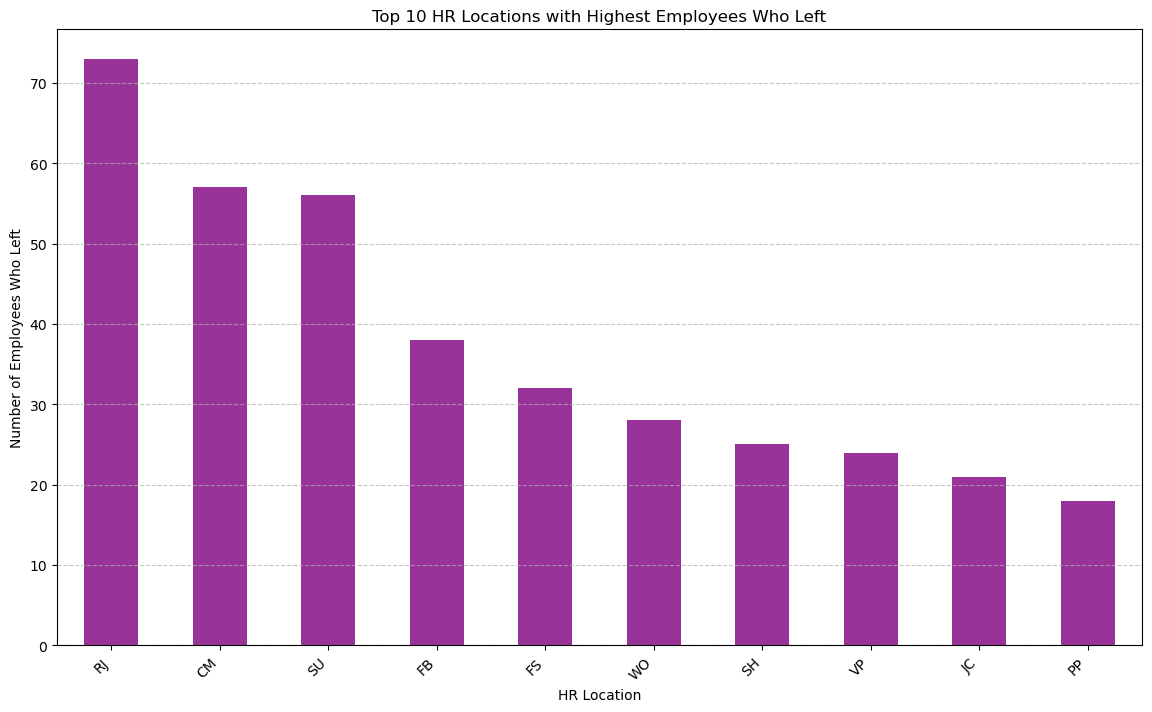

In [20]:
# Filter the data to count the number of employees who left for each HR location and select the top 10
top_10_hr_locations_left = data[data['Left'] == 1].groupby('HR location').size().sort_values(ascending=False).head(10)

# Plot bar chart for the top 10 HR locations with employees who left
plt.figure(figsize=(14, 8))
top_10_hr_locations_left.plot(kind='bar', color='purple', alpha=0.8)
plt.title('Top 10 HR Locations with Highest Employees Who Left')
plt.xlabel('HR Location')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

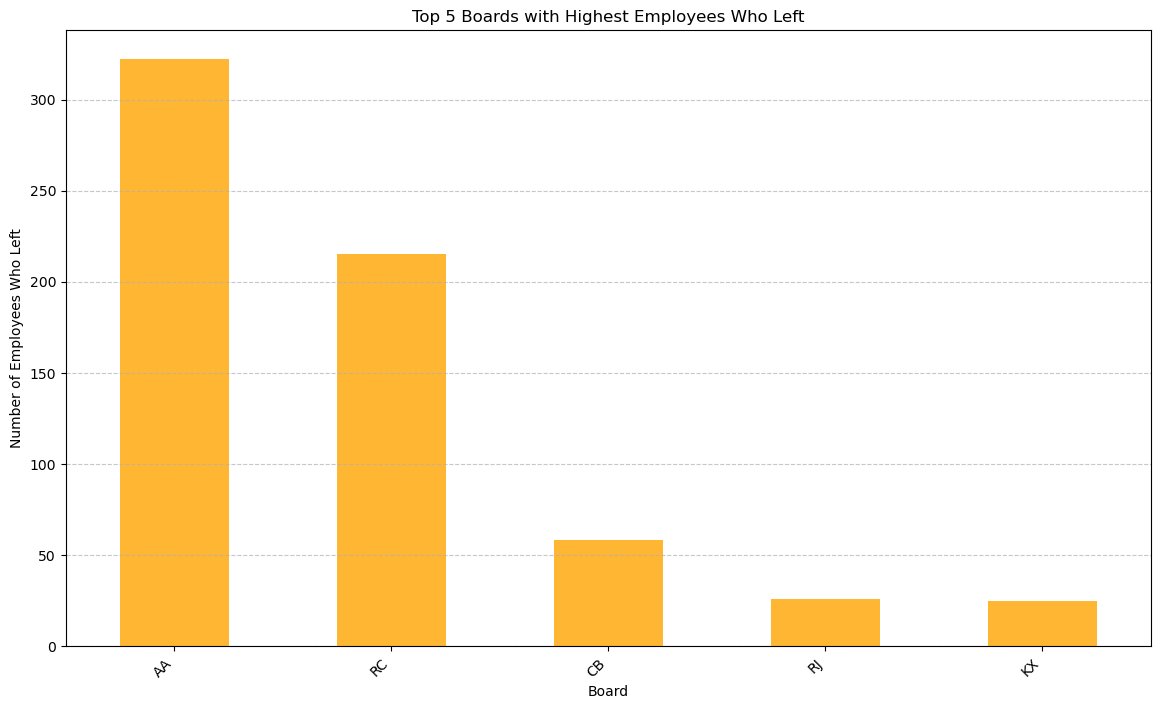

In [21]:
# Filter the data to count the number of employees who left for each Board and select the top 10
top_5_boards_left = data[data['Left'] == 1].groupby('Board').size().sort_values(ascending=False).head()

# Plot bar chart for the top 10 Boards with employees who left
plt.figure(figsize=(14, 8))
top_5_boards_left.plot(kind='bar', color='orange', alpha=0.8)
plt.title('Top 5 Boards with Highest Employees Who Left')
plt.xlabel('Board')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

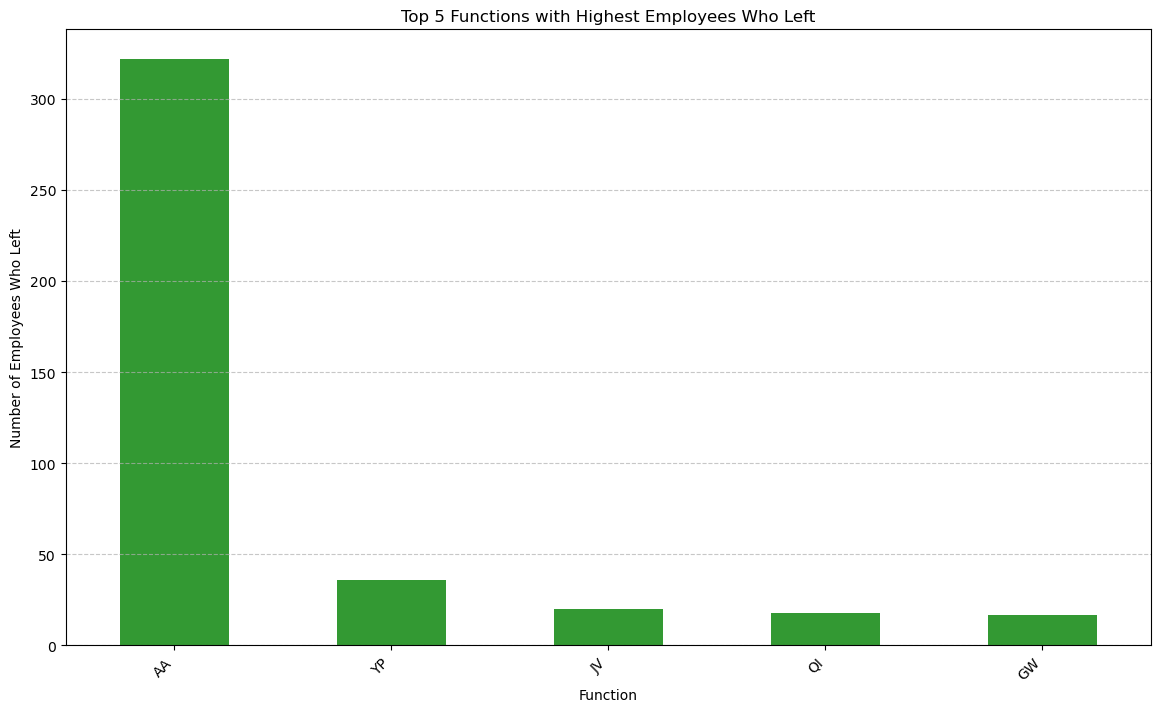

In [22]:
# Filter the data to count the number of employees who left for each Function and select the top 10
top_5_functions_left = data[data['Left'] == 1].groupby('Function').size().sort_values(ascending=False).head()

# Plot bar chart for the top 10 Functions with employees who left
plt.figure(figsize=(14, 8))
top_5_functions_left.plot(kind='bar', color='green', alpha=0.8)
plt.title('Top 5 Functions with Highest Employees Who Left')
plt.xlabel('Function')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

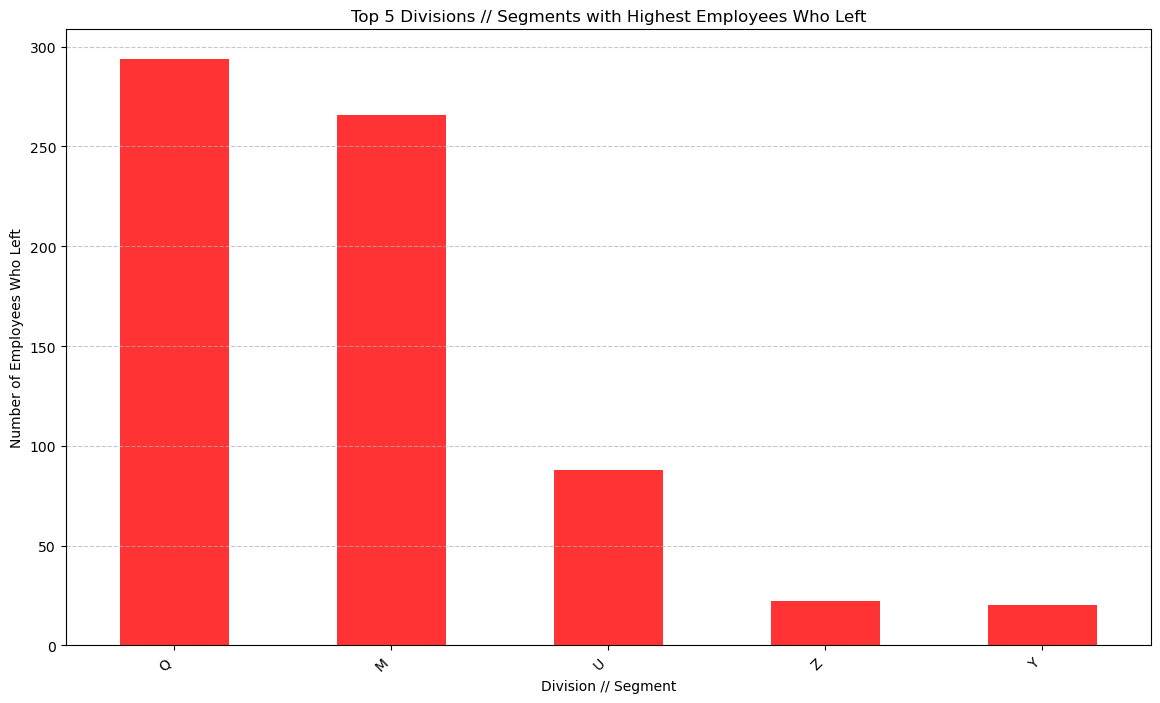

In [23]:
# Filter the data to count the number of employees who left for each Division // Segment and select the top 5
top_5_divisions_left = (
    data[data['Left'] == 1]
    .groupby('Division // Segment').size()
    .sort_values(ascending=False)
    .head(5)
)

# Plot bar chart for the top 5 Divisions // Segments with employees who left
plt.figure(figsize=(14, 8))
top_5_divisions_left.plot(kind='bar', color='red', alpha=0.8)
plt.title('Top 5 Divisions // Segments with Highest Employees Who Left')
plt.xlabel('Division // Segment')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

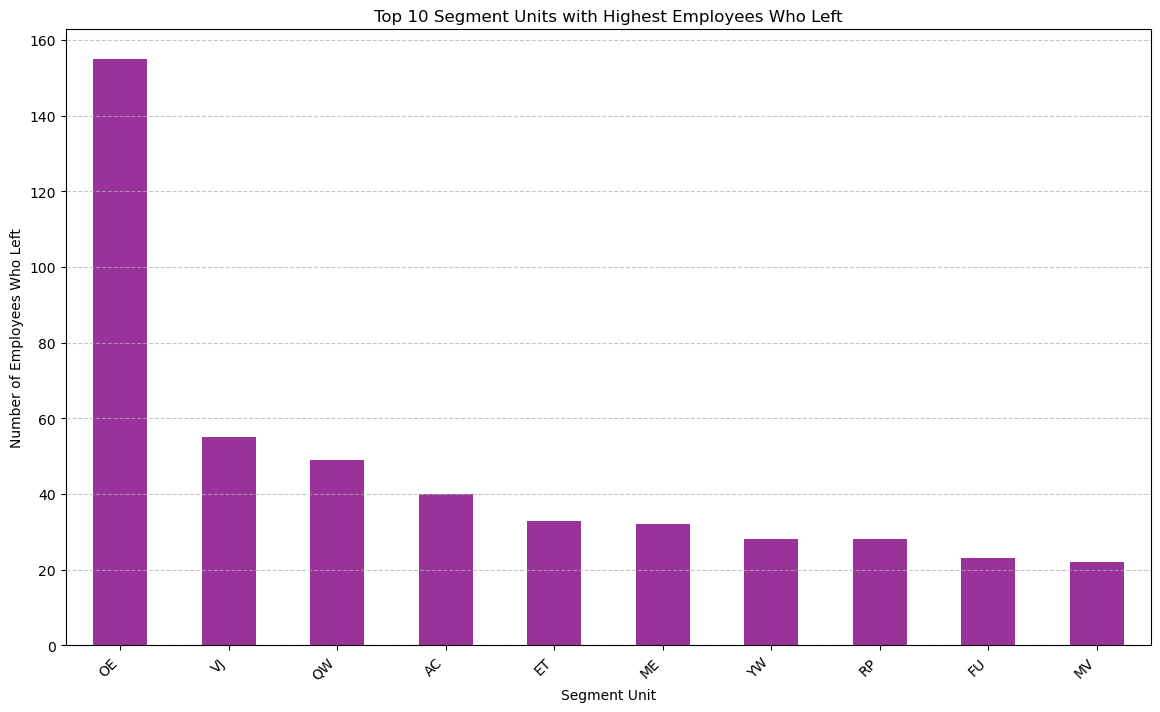

In [24]:
# Filter the data to count the number of employees who left for each Segment Unit and select the top 10
top_10_segment_units_left = (
    data[data['Left'] == 1]
    .groupby('Segment Unit').size()
    .sort_values(ascending=False)
    .head(10)
)

# Plot bar chart for the top 10 Segment Units with employees who left
plt.figure(figsize=(14, 8))
top_10_segment_units_left.plot(kind='bar', color='purple', alpha=0.8)
plt.title('Top 10 Segment Units with Highest Employees Who Left')
plt.xlabel('Segment Unit')
plt.ylabel('Number of Employees Who Left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

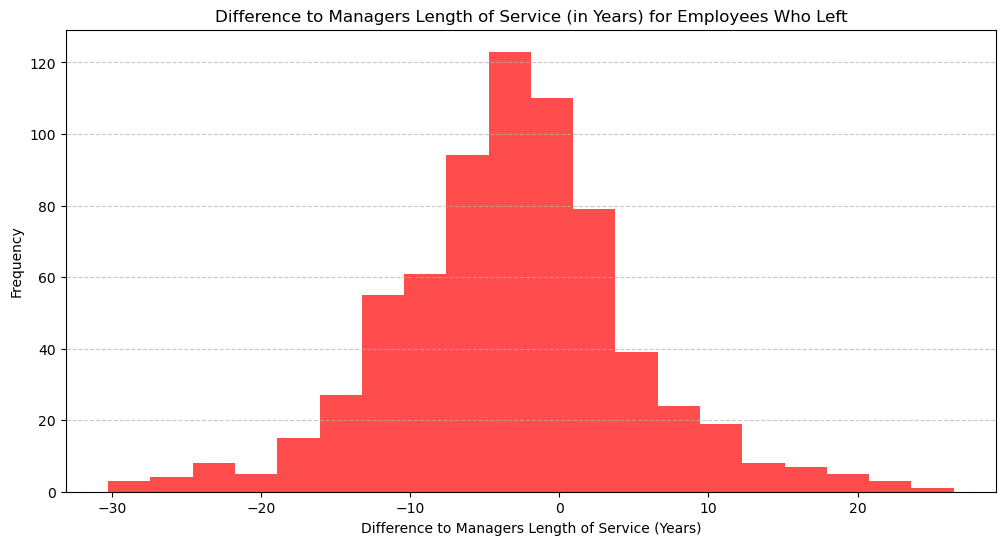

In [25]:
# Plot histogram for Difference to Managers Length of Service for employees who left
plt.figure(figsize=(12, 6))
plt.hist(
    data[data['Left'] == 1]['Difference to Managers Length of Service (in Years)'],
    bins=20,
    color='red',
    alpha=0.7,
)
plt.title('Difference to Managers Length of Service (in Years) for Employees Who Left')
plt.xlabel('Difference to Managers Length of Service (Years)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

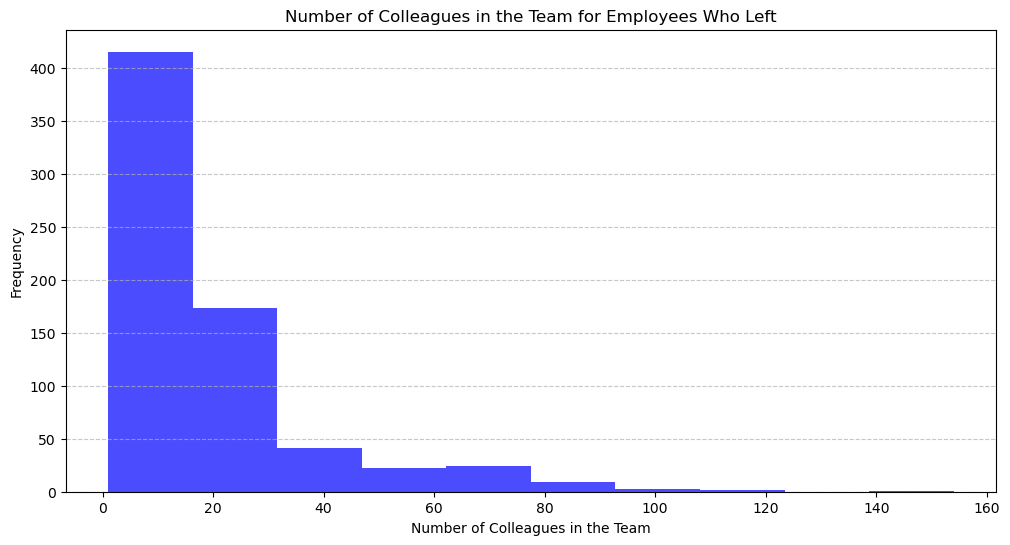

In [26]:
# Plot histogram for Number of Colleagues in the Team for employees who left
plt.figure(figsize=(12, 6))
plt.hist(
    data[data['Left'] == 1]['Number of Colleagues in the Team'],
    bins=10,
    color='blue',
    alpha=0.7,
)
plt.title('Number of Colleagues in the Team for Employees Who Left')
plt.xlabel('Number of Colleagues in the Team')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

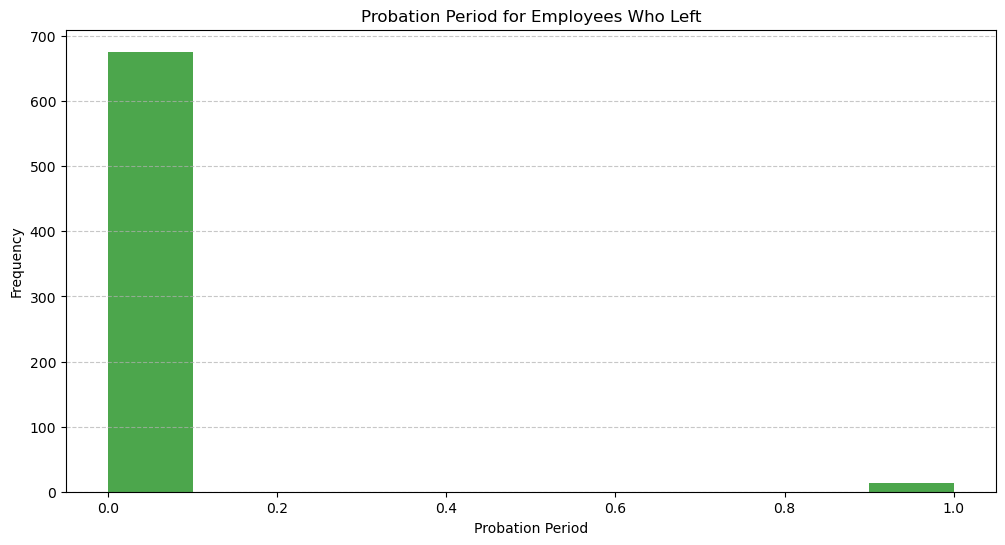

In [27]:
# Plot histogram for Probation Period for employees who left
plt.figure(figsize=(12, 6))
plt.hist(
    data[data['Left'] == 1]['Probation Period'].dropna(),
    bins=10,
    color='green',
    alpha=0.7,
)
plt.title('Probation Period for Employees Who Left')
plt.xlabel('Probation Period')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

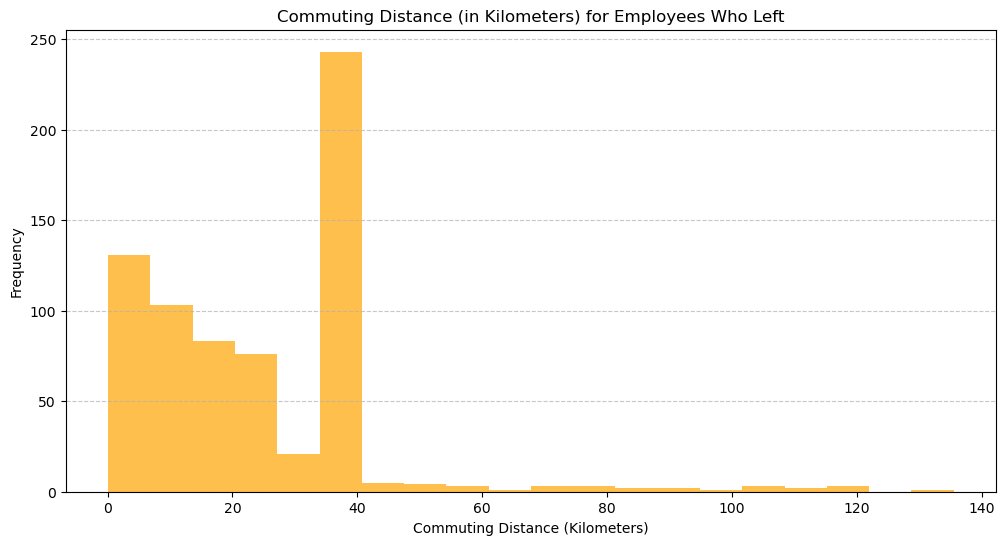

In [28]:
# Plot histogram for Commuting Distance (in Kilometers) for employees who left
plt.figure(figsize=(12, 6))
plt.hist(
    data[data['Left'] == 1]['Commuting distance (in Kilometers)'].dropna(),
    bins=20,
    color='orange',
    alpha=0.7,
)
plt.title('Commuting Distance (in Kilometers) for Employees Who Left')
plt.xlabel('Commuting Distance (Kilometers)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

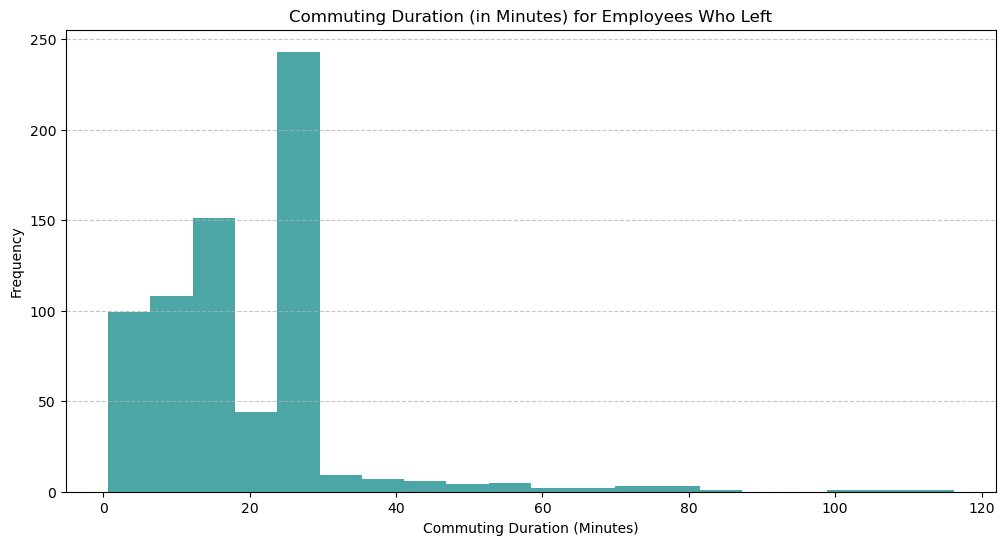

In [29]:
# Plot histogram for Commuting Duration (in Minutes) for employees who left
plt.figure(figsize=(12, 6))
plt.hist(
    data[data['Left'] == 1]['Commuting duration (in Minutes)'].dropna(),
    bins=20,
    color='teal',
    alpha=0.7,
)
plt.title('Commuting Duration (in Minutes) for Employees Who Left')
plt.xlabel('Commuting Duration (Minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Correlation Analysis

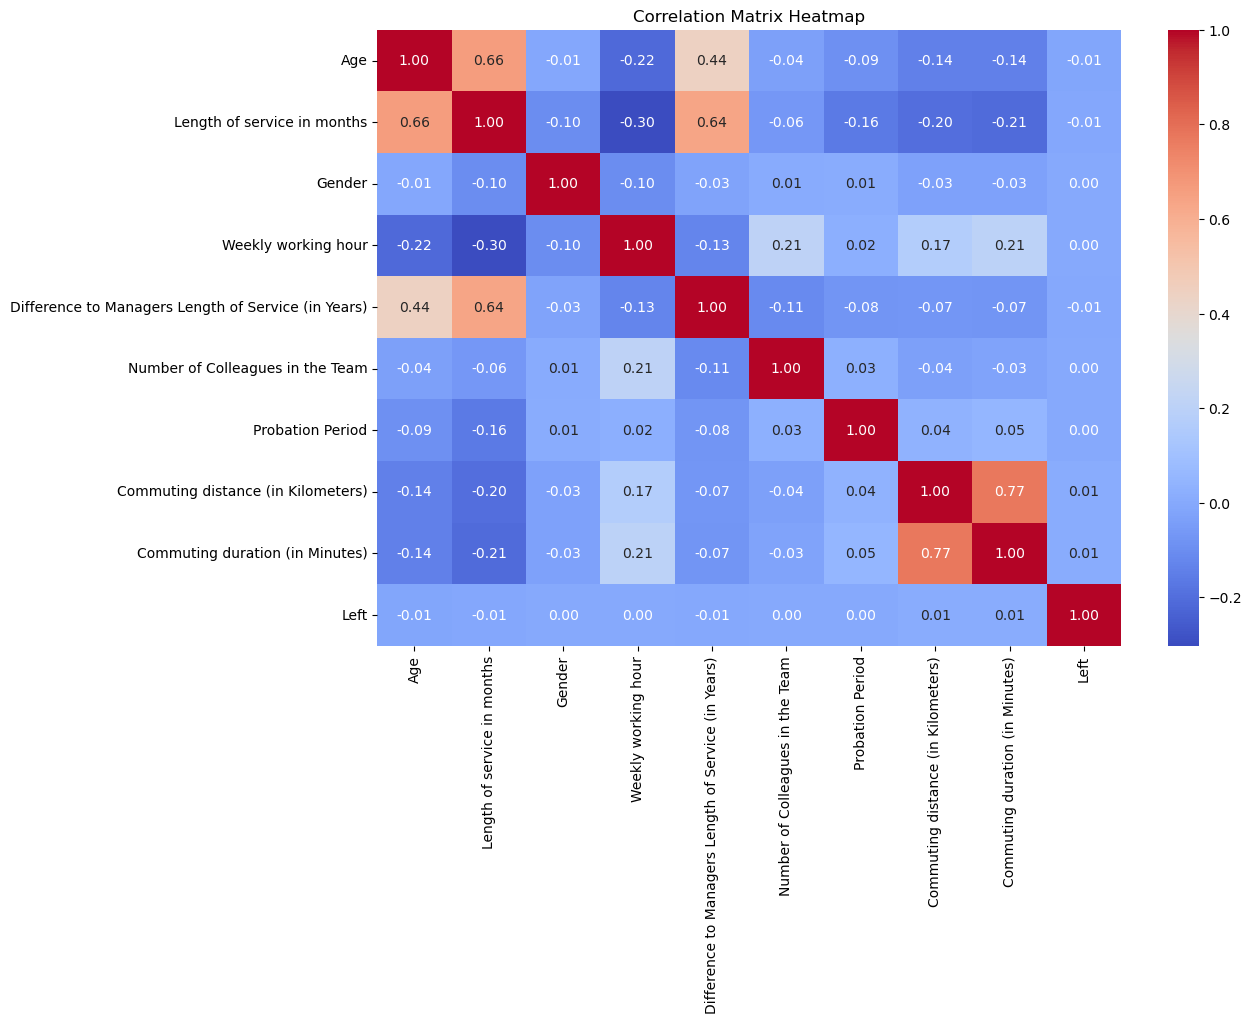

In [30]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Display correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Multivariate analysis of the features

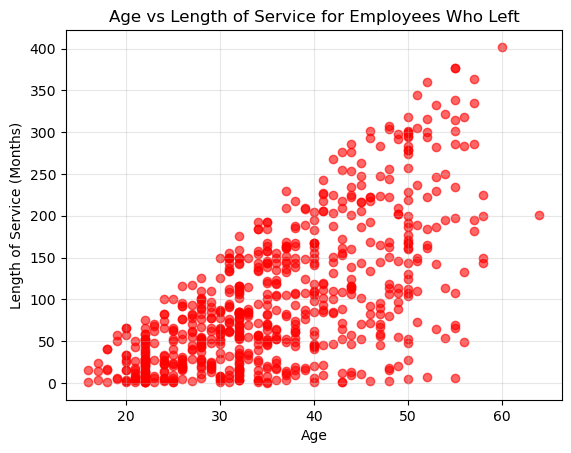

In [31]:
# Filter data for employees who left
left_employees = data[data['Left'] == 1]

plt.scatter(
    left_employees['Age'],
    left_employees['Length of service in months'],
    color='red',
    alpha=0.6
)

plt.title('Age vs Length of Service for Employees Who Left')
plt.xlabel('Age')
plt.ylabel('Length of Service (Months)')
plt.grid(alpha=0.3)
plt.show()

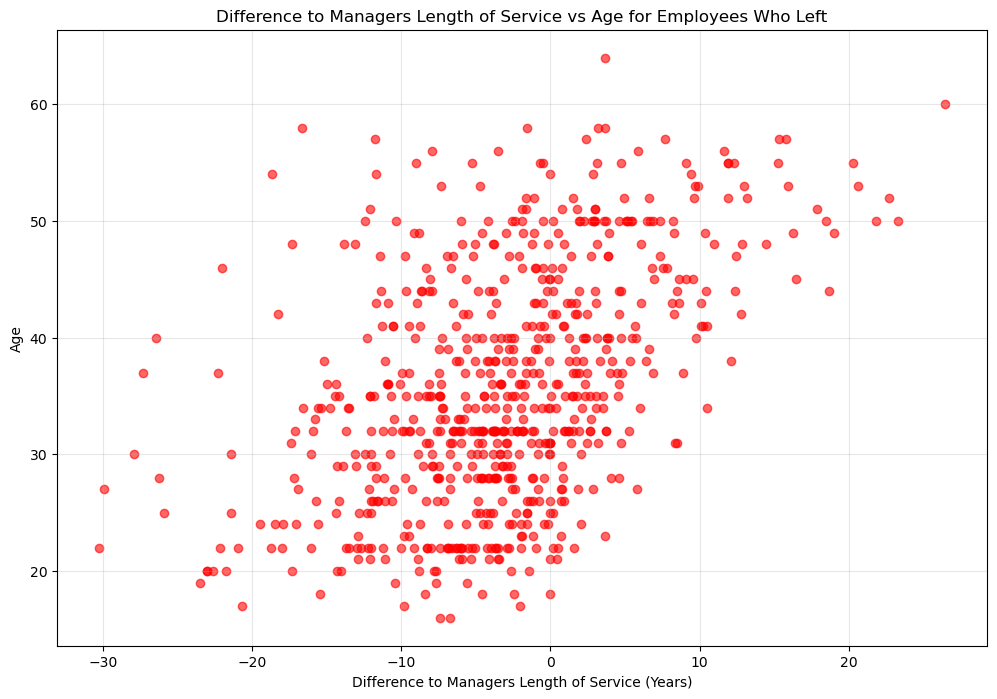

In [32]:
# Create a scatter plot to analyze the relationship between Difference to Managers Length of Service, Age for employees who left
plt.figure(figsize=(12, 8))

# Filter data for employees who left
left_employees = data[data['Left'] == 1]

plt.scatter(
    left_employees['Difference to Managers Length of Service (in Years)'],
    left_employees['Age'],
    color='red',
    alpha=0.6
)

plt.title('Difference to Managers Length of Service vs Age for Employees Who Left')
plt.xlabel('Difference to Managers Length of Service (Years)')
plt.ylabel('Age')
plt.grid(alpha=0.3)
plt.show()

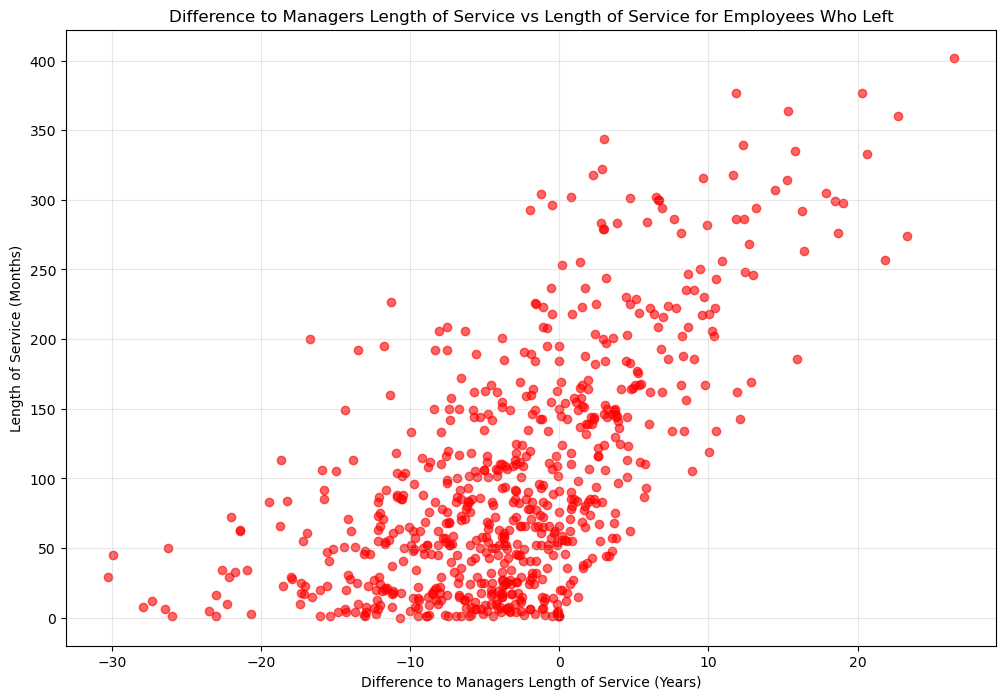

In [33]:
# Create a scatter plot to analyze the relationship between Difference to Managers Length of Service, Length of Service for employees who left
plt.figure(figsize=(12, 8))

# Filter data for employees who left
left_employees = data[data['Left'] == 1]

plt.scatter(
    left_employees['Difference to Managers Length of Service (in Years)'],
    left_employees['Length of service in months'],
    color='red',
    alpha=0.6
)

plt.title('Difference to Managers Length of Service vs Length of Service for Employees Who Left')
plt.xlabel('Difference to Managers Length of Service (Years)')
plt.ylabel('Length of Service (Months)')
plt.grid(alpha=0.3)
plt.show()

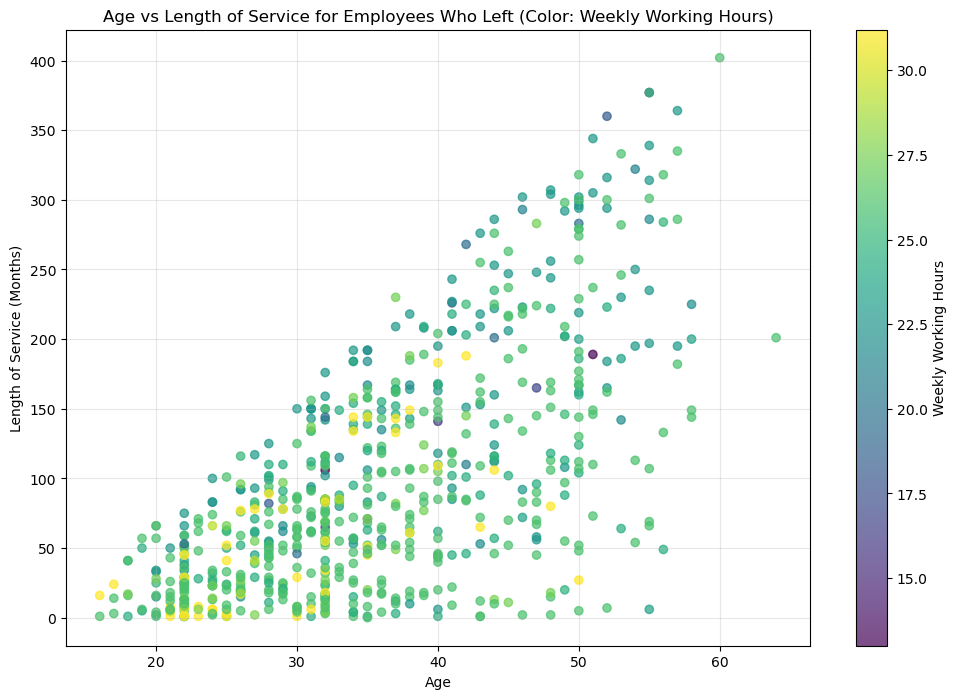

In [34]:
# Age, Length of Service, and Weekly Working Hours Relationship
left_employees = data[data['Left'] == 1]

# Create a 2D color-coded scatter plot for Age, Length of Service, and Weekly Working Hours
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    left_employees['Age'],
    left_employees['Length of service in months'],
    c=left_employees['Weekly working hour'],
    cmap='viridis',
    alpha=0.7
)

plt.colorbar(scatter, label='Weekly Working Hours')
plt.title('Age vs Length of Service for Employees Who Left (Color: Weekly Working Hours)')
plt.xlabel('Age')
plt.ylabel('Length of Service (Months)')
plt.grid(alpha=0.3)
plt.show()

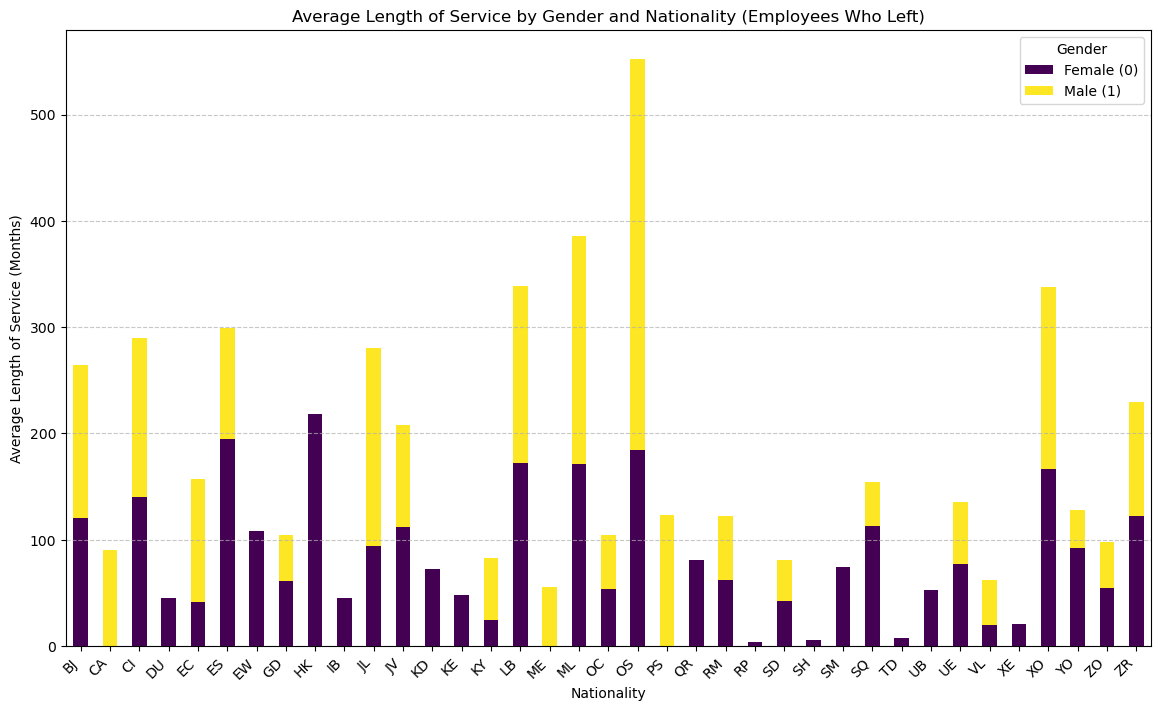

In [35]:
# Filter data for employees who left
left_employees = data[data['Left'] == 1]

# Group the data by Gender and Nationality and calculate the mean Length of Service
service_by_gender_nationality = (
    left_employees.groupby(['Gender', 'Nationality'])['Length of service in months']
    .mean()
    .reset_index()
    .rename(columns={'Length of service in months': 'Average Length of Service'})
)

# Pivot the data for visualization
pivot_service = service_by_gender_nationality.pivot(index='Nationality', columns='Gender', values='Average Length of Service')

# Plot the grouped bar chart
pivot_service.plot(kind='bar', figsize=(14, 8), stacked=True, cmap='viridis')

plt.title('Average Length of Service by Gender and Nationality (Employees Who Left)')
plt.xlabel('Nationality')
plt.ylabel('Average Length of Service (Months)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', labels=['Female (0)', 'Male (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

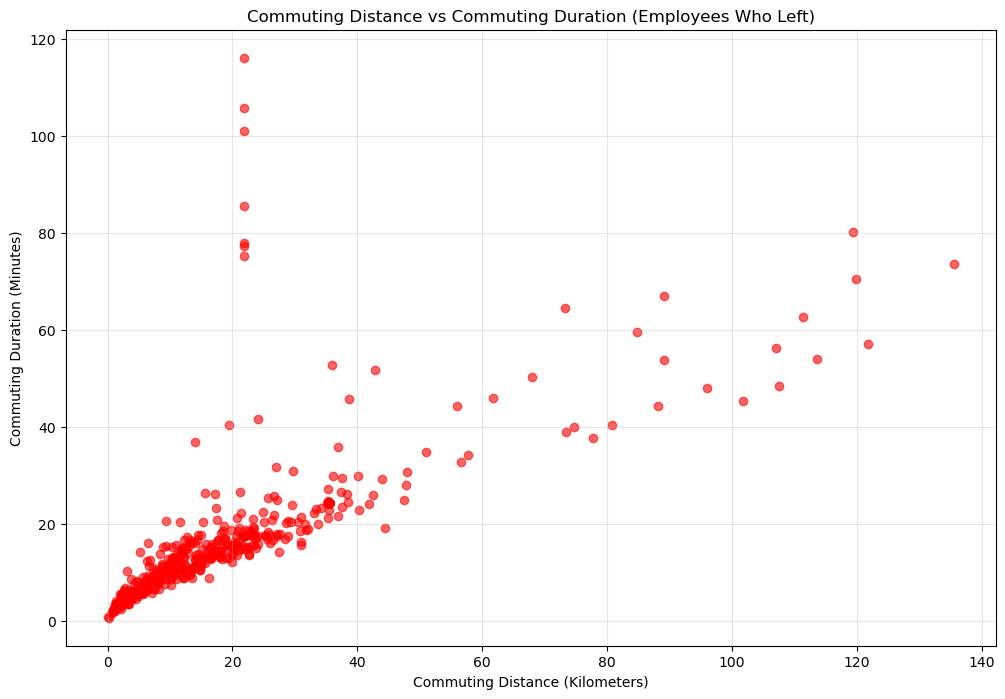

In [36]:
# Filter data for employees who left
left_employees = data[data['Left'] == 1]

# Create a scatter plot for Commuting Distance and Commuting Duration for employees who left
plt.figure(figsize=(12, 8))
plt.scatter(
    left_employees['Commuting distance (in Kilometers)'],
    left_employees['Commuting duration (in Minutes)'],
    color='red',
    alpha=0.6
)

plt.title('Commuting Distance vs Commuting Duration (Employees Who Left)')
plt.xlabel('Commuting Distance (Kilometers)')
plt.ylabel('Commuting Duration (Minutes)')
plt.grid(alpha=0.3)
plt.show()

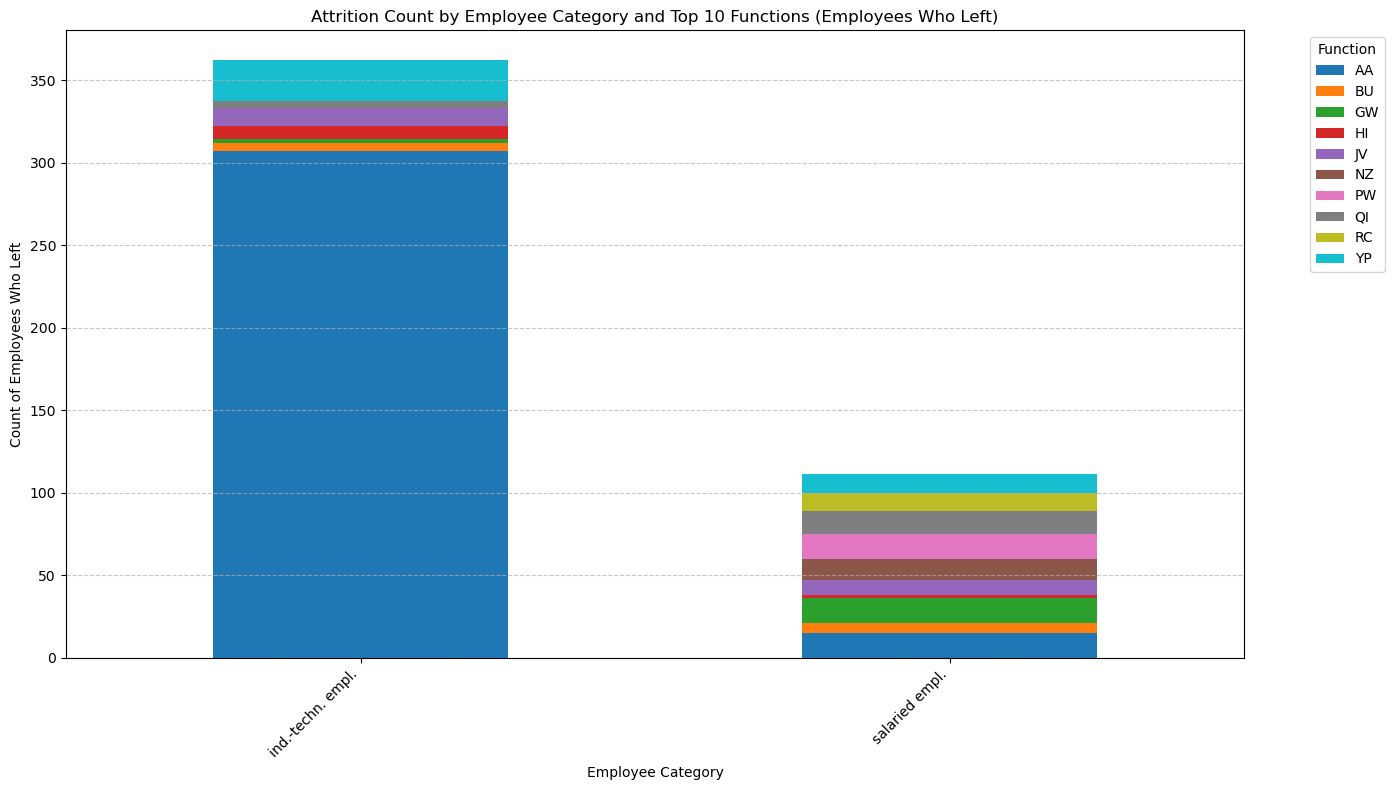

In [37]:
# Get the top 10 functions with the highest number of employees who left
top_10_functions = left_employees['Function'].value_counts().head(10).index

# Filter data for the top 10 functions
filtered_left_employees = left_employees[left_employees['Function'].isin(top_10_functions)]

# Calculate the count of employees who left grouped by Employee Category and Function
category_function_counts = filtered_left_employees.groupby(['Employee Category', 'Function']).size().reset_index(name='Count')

# Pivot the data for visualization
pivot_data = category_function_counts.pivot(index='Employee Category', columns='Function', values='Count').fillna(0)

# Plot a grouped bar chart
pivot_data.plot(kind='bar', figsize=(14, 8), stacked=True, cmap='tab10')

plt.title('Attrition Count by Employee Category and Top 10 Functions (Employees Who Left)')
plt.xlabel('Employee Category')
plt.ylabel('Count of Employees Who Left')
plt.legend(title='Function', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

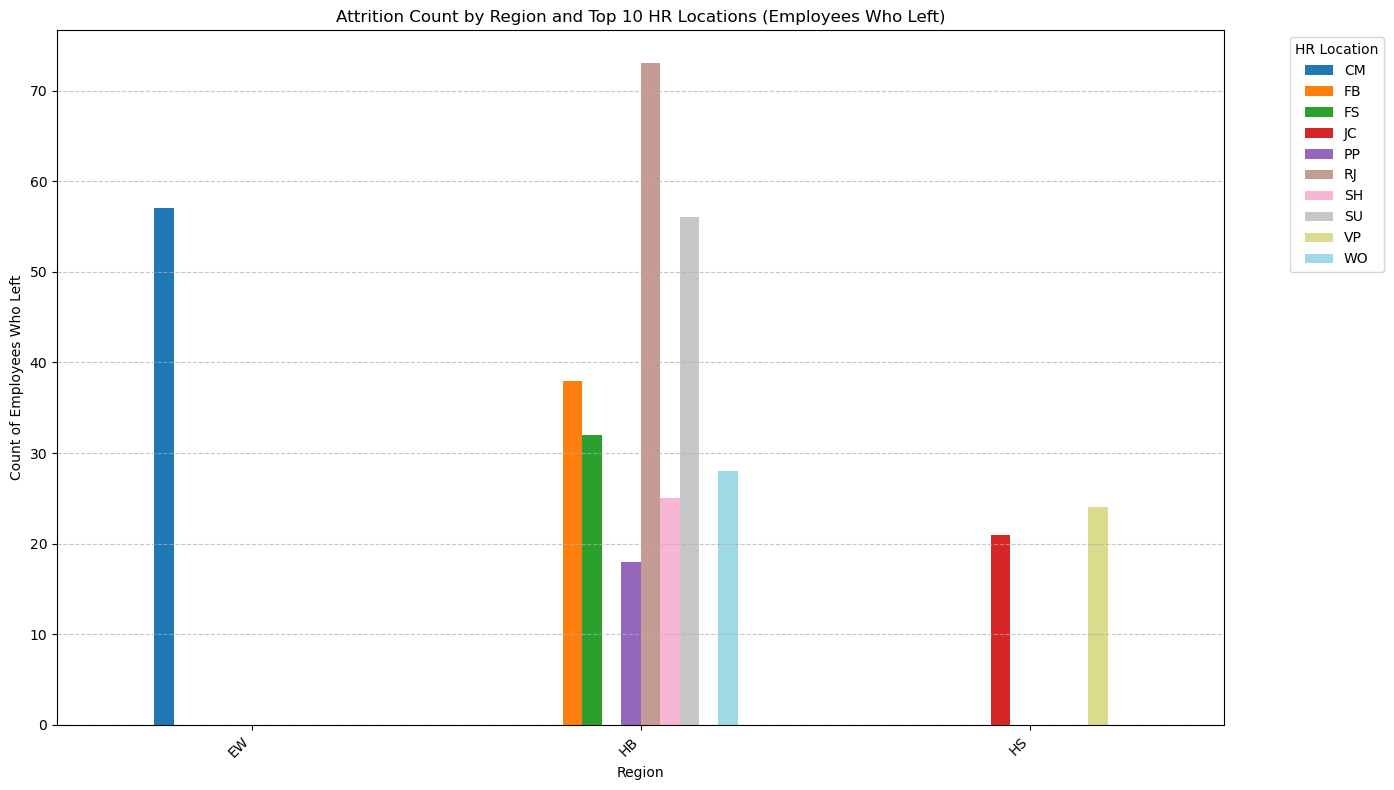

In [38]:
# Filter data for employees who left
left_employees = data[data['Left'] == 1]

# Get the top 10 HR locations with the highest number of employees who left
top_10_hr_locations = left_employees['HR location'].value_counts().head(10).index

# Filter data for the top 10 HR locations
filtered_left_employees = left_employees[left_employees['HR location'].isin(top_10_hr_locations)]

# Calculate the count of employees who left grouped by Region and HR Location
region_hr_counts = filtered_left_employees.groupby(['Region', 'HR location']).size().reset_index(name='Count')

# Pivot the data for visualization
pivot_data = region_hr_counts.pivot(index='Region', columns='HR location', values='Count').fillna(0)

# Plot a clustered bar chart
pivot_data.plot(kind='bar', figsize=(14, 8), cmap='tab20')

plt.title('Attrition Count by Region and Top 10 HR Locations (Employees Who Left)')
plt.xlabel('Region')
plt.ylabel('Count of Employees Who Left')
plt.legend(title='HR Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

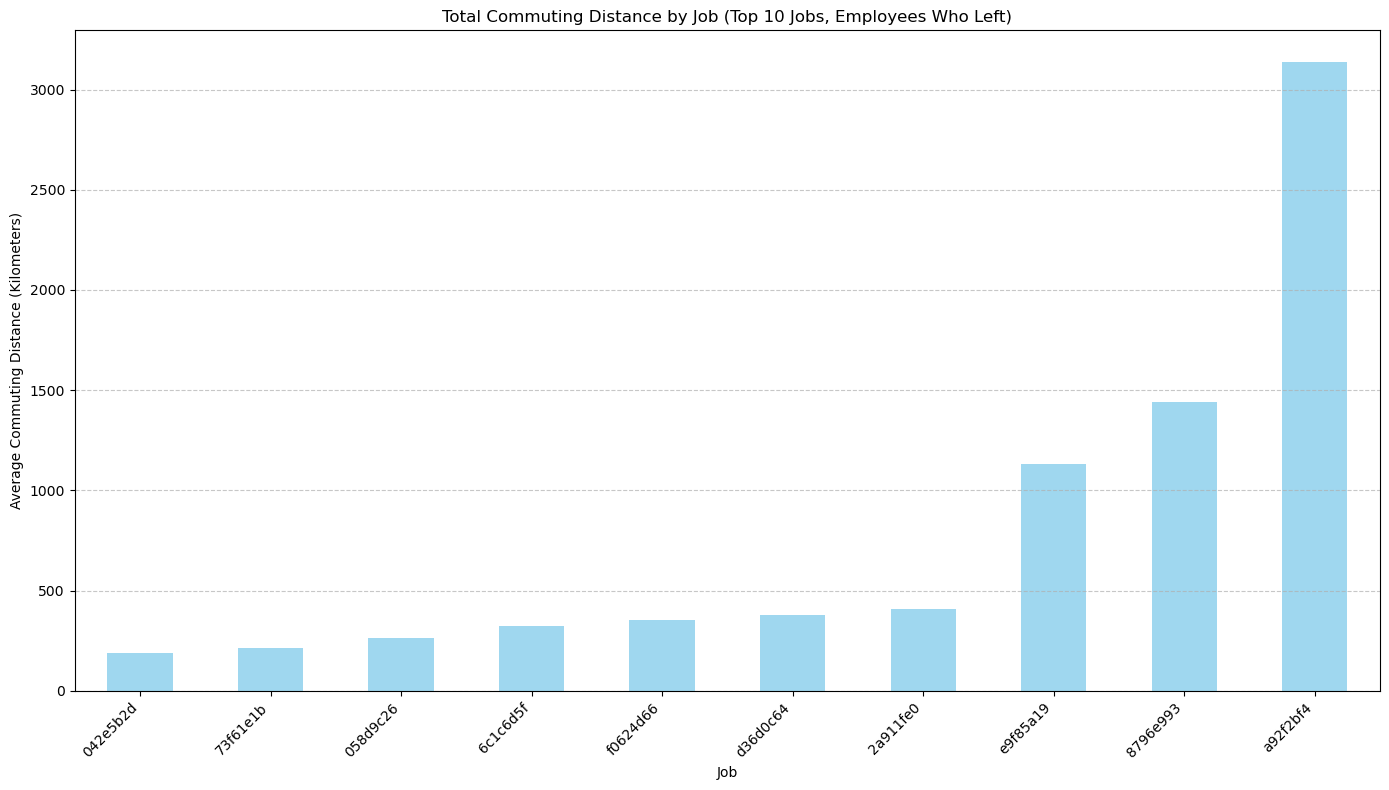

In [39]:
# Filter data for employees who left and belong to top 10 jobs
top_10_jobs = left_employees['Job'].value_counts().head(10).index
filtered_data = left_employees[left_employees['Job'].isin(top_10_jobs)]

# Calculate average commuting distance for each job
total_commuting_distance = filtered_data.groupby('Job')['Commuting distance (in Kilometers)'].sum()

# Create a bar plot
plt.figure(figsize=(14, 8))
total_commuting_distance.sort_values().plot(kind='bar', color='skyblue', alpha=0.8)

plt.title('Total Commuting Distance by Job (Top 10 Jobs, Employees Who Left)')
plt.xlabel('Job')
plt.ylabel('Average Commuting Distance (Kilometers)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()